In [1]:
### JUPYTER NOTEBOOK / MODULE PATH FIX ###
import sys

if "/share/apps/python/3.8.6/intel/lib/python3.8" in sys.path and sys.path[1] == '':
    sys.path[1], sys.path[6] = sys.path[6], sys.path[1]

In [2]:
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

from jtb_2022_code.utils.figure_common import *
from jtb_2022_code.utils.activity_common import calc_activity_expression
from jtb_2022_code import FigureSingleCellData


/home/cj59/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/cj59/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/cj59/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/cj59/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [7]:
-1 * 128 * np.log2(1/128) * 1/128

7.0

In [10]:
-1 * 2 * np.log2(1/2) * 1/2

1.0

In [3]:
data = FigureSingleCellData()
#data._unload()
#prior = pd.read_csv("./Data/YEASTRACT_20190713_BOTH.tsv", sep="\t", index_col=0)

Reading Single Cell Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_1_WT.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_1_fpr1.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_2_WT.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_2_fpr1.h5ad


In [ ]:
#data._unload()


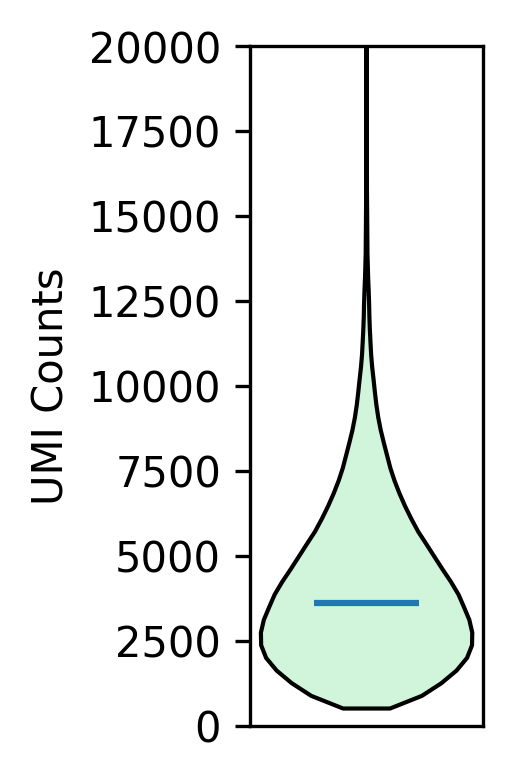

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(1, 3), dpi=300)
parts = ax.violinplot(data.all_data.obs['n_counts'], showmeans=False, showmedians=True, showextrema=False)
ax.set_ylim(0, 20000)
ax.set_ylabel("UMI Counts")
ax.set_xticks([])

for pc in parts['bodies']:
    pc.set_facecolor('#d0f5da')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

In [29]:
from inferelator_velocity.programs import _get_pcs
from inferelator_velocity.utils import standardize_data
import anndata as ad


_n_l_clusts = data.all_data.var['leiden'].nunique()

print(
    f"Found {_n_l_clusts} unique gene clusters"
)

# Get the first PC for each cluster of genes
_cluster_pc1 = np.zeros((data.all_data.shape[0], _n_l_clusts - 1), dtype=float)
d = standardize_data(ad.AnnData(data.all_data.layers['counts'], var=data.all_data.var))
for i in range(_n_l_clusts - 1):
    _cluster_pc1[:, i] = _get_pcs(
        d.X[:, data.all_data.var['leiden'] == str(i)],
        return_var_explained=False
    ).ravel()
    print(
        f"Calculating PC1 for cluster {i}"
    )
del d

Found 15 unique gene clusters


<ipython-input-29-c4a5537f3a71>:14: FutureWarning: X.dtype being converted to np.float32 from int32. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  d = standardize_data(ad.AnnData(data.all_data.layers['counts'], var=data.all_data.var))


Calculating PC1 for cluster 0
Calculating PC1 for cluster 1
Calculating PC1 for cluster 2
Calculating PC1 for cluster 3
Calculating PC1 for cluster 4
Calculating PC1 for cluster 5
Calculating PC1 for cluster 6
Calculating PC1 for cluster 7
Calculating PC1 for cluster 8
Calculating PC1 for cluster 9
Calculating PC1 for cluster 10
Calculating PC1 for cluster 11
Calculating PC1 for cluster 12
Calculating PC1 for cluster 13


In [30]:
from inferelator_velocity.metrics import information_distance
from inferelator.regression.mi import _make_array_discrete

dists = information_distance(
    _make_array_discrete(
        _cluster_pc1,
        10,
        axis=0
    ),
    10,
    n_jobs=10,
    logtype=np.log2
)

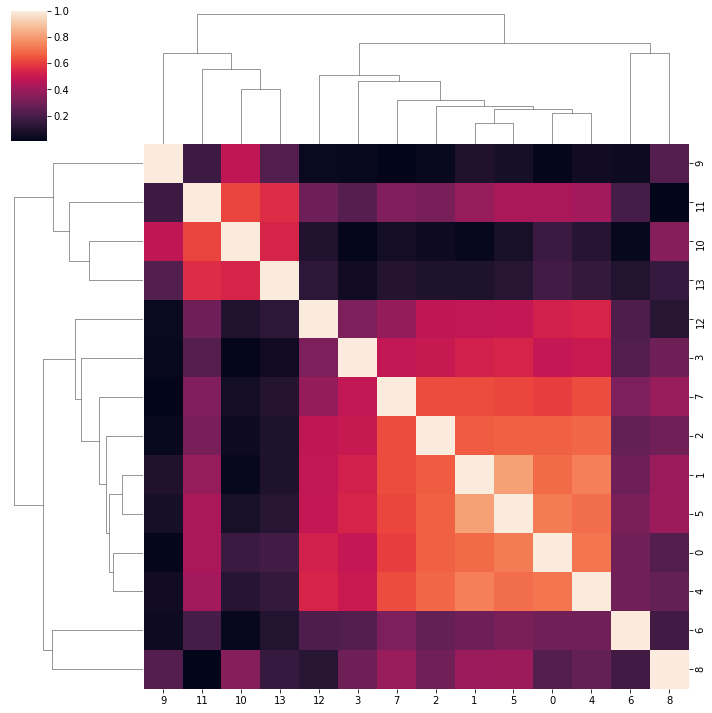

In [40]:
import seaborn as sns
from scipy.stats import spearmanr

#sns.clustermap(dists)
sns.clustermap(np.abs(spearmanr(_cluster_pc1))[0], metric='man')

In [37]:
data.all_data.var.loc[data.all_data.var['programs'] == '0', 'leiden'].unique()

['-1', '0', '1', '12', '2', '7', '6', '4', '3', '5']
Categories (15, object): ['0', '1', '2', '3', ..., '11', '12', '13', '-1']

In [14]:
from inferelator_velocity.plotting.mcv_summary import mcv_plot

#fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=300)

#mcv_plot(data.all_data, ax=ax)

data.all_data.uns['pca']

{'params': {'use_highly_variable': False, 'zero_center': True},
 'variance': array([118.66202585,  12.75583041,  10.80979401,   6.35861764,
          6.08057065,   2.51228598,   2.36618694,   2.14502558,
          1.74491225,   1.51239907,   1.36240861,   1.22075987,
          0.99476129,   0.91679613,   0.86406673,   0.82917103,
          0.73662659,   0.71476845,   0.67015265,   0.64306605,
          0.61747166,   0.5813158 ,   0.55519562,   0.51051032,
          0.47514881,   0.46482964,   0.45089731,   0.44682054,
          0.43223935,   0.41929544,   0.40351151,   0.39522545,
          0.39210278,   0.38652348,   0.37840605,   0.37499086,
          0.37133705,   0.36454189,   0.36317046,   0.36163899,
          0.35620181,   0.35150787,   0.34801161,   0.34651714,
          0.34544663,   0.34315411,   0.34068157,   0.33997568,
          0.3398308 ,   0.33866398,   0.3372228 ,   0.33602295,
          0.33562046,   0.33470902,   0.33356577,   0.33263999,
          0.33253969,   0.33

In [ ]:
data.expt_data[(1, "WT")].uns['program_0_pca']#['molecular_cv_loss']

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=300)

_n_comps = data.all_data.uns['programs']['molecular_cv_loss'].ravel().shape[0]
_min_comp = np.argmin(data.all_data.uns['programs']['molecular_cv_loss'].ravel()[1:]) + 1

ax.plot(
    np.arange(1, _n_comps),
    data.all_data.uns['programs']['molecular_cv_loss'].ravel()[1:],
    color="gray"
)

ax.axvline(
    _min_comp,
    color='black',
    linestyle="--"
)

ax.set_ylabel(
    "MSE"
)

ax.set_xlabel(
    "# Components"
)

ax.annotate(
    f"{_min_comp} Components",
    xy=(0.2, 0.8),
    xycoords='axes fraction'
)

fig

In [ ]:
denoised[(1, "WT")]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=300)

ax.scatter(
    x=denoised[(2, "WT")].obs['program_rapa_time'].values, 
    y=denoised[(2, "WT")].obsm['activity_expression'][:, denoised[(1, "WT")].uns['activity_expression']['gene_names'] == "YNL216W"].ravel(), 
    color='black',
    s=1,
    alpha=0.01
)



In [ ]:
from jtb_2022_code import FigureSingleCellData

import gc
import anndata as ad
import numpy as np
import inferelator_velocity as ifv

PROGS = ['0', '1']
CC_WRAP_TIME = 88

OUTPUT_FILE = "/scratch/cj59/RAPA/2021_RAPA_INFERELATOR.h5ad"

data = FigureSingleCellData()


In [ ]:
d = data.decay_data(1, "WT")

In [ ]:
d.X.min()

In [ ]:
print("Creating new data object from counts")

inf_data = ad.AnnData(
    data.all_data.layers['counts'].copy(),
    obs = data.all_data.obs,
    var = data.all_data.var[['CommonName', 'category']],
    dtype=data.all_data.layers['counts'].dtype
)

print("Copying programs and times")
inf_data.uns['programs'] = data.all_data.uns['programs'].copy()

# Copy cell cycle time to main object
inf_data.obs['program_0_time'] = np.nan
inf_data.obs['program_1_time'] = np.nan

for _, e in data.expt_data.items():
    inf_data.obs.loc[e.obs_names, 'program_0_time'] = e.obs['program_0_time']
    inf_data.obs.loc[e.obs_names, 'program_1_time'] = e.obs['program_1_time']

# Wrap cell cycle times
_cc_time = f"program_{inf_data.uns['programs']['cell_cycle_program']}_time"

print(f"{inf_data.obs[_cc_time].min()} - {inf_data.obs[_cc_time].max()}")

inf_data.obs.loc[inf_data.obs[_cc_time] < 0, _cc_time] = inf_data.obs.loc[inf_data.obs[_cc_time] < 0, _cc_time] + CC_WRAP_TIME
inf_data.obs.loc[inf_data.obs[_cc_time] > CC_WRAP_TIME, _cc_time] = inf_data.obs.loc[inf_data.obs[_cc_time]  > CC_WRAP_TIME, _cc_time] - CC_WRAP_TIME

#data._unload()

In [ ]:
data.decay_data(1, "WT")

In [ ]:
print("Calculating gene-program assignments")
# Get gene-program assignments based on mutual information
inf_data.var['program'] = ifv.assign_genes_to_programs(
    inf_data,
    programs = PROGS,
    default_program = inf_data.uns['programs']['rapa_program'],
    default_threshold = 0.01,
    use_sparse = False,
    n_bins = 20,
    verbose = True
)


In [ ]:
import numpy as np
import scanpy as sc

from inferelator_velocity.utils.misc import vprint

from inferelator_velocity.utils import copy_count_layer
from inferelator_velocity.utils.keys import OBS_TIME_KEY, N_BINS
from inferelator_velocity.metrics import mutual_information
from inferelator.regression.mi import _make_array_discrete


def assign_genes_to_programs(
    data,
    layer="X",
    programs=None,
    return_mi=False,
    default_program=None,
    default_threshold=None,
    verbose=False
):
    """
    Find programs which have highest mutual information
    with every gene

    :param data: AnnData object which `ifv.program_select()` has been called on
    :type data: ad.AnnData
    :param layer: Layer containing count data, defaults to "X"
    :type layer: str, optional
    :param programs: Program IDs to calculate times for, defaults to None
    :type programs: tuple, optional
    :return: AnnData object with `program_{id}_distances` obps key
    :rtype: ad.AnnData
    """

    if programs is None:
        programs = [
            p
            for p in data.uns['programs']['program_names']
            if p != '-1'
        ]
    elif type(programs) == list or type(programs) == tuple or isinstance(programs, np.ndarray):
        pass
    else:
        programs = [programs]

    programs = np.asarray(programs)

    d = copy_count_layer(data, layer)
    sc.pp.normalize_per_cell(d)

    _times = np.zeros((d.shape[0], len(programs)))

    # Unpack times into an array
    for i, p in enumerate(programs):

        _tk = OBS_TIME_KEY.format(prog=p)

        if _tk in data.obs:
            _times[:, i] = data.obs[_tk].values
        else:
            raise ValueError(
                f"Unable to find times for program {p} "
                f"in .obs[{_tk}]"
            )

    vprint(
        f"Extracted times {_times.shape} "
        f"for programs {', '.join(programs)}",
        verbose=verbose
    )

    # Calculate mutual information between times and genes

    mi = mutual_information(
        _make_array_discrete(
            d.X,
            N_BINS,
            axis=0
        ),
        N_BINS,
        y=_make_array_discrete(
            _times,
            N_BINS,
            axis=0
        )
    )

    new_labels = programs[np.argmax(mi, axis=1)]

    if default_program is not None:
        new_labels[np.max(mi, axis=1) < default_threshold] = default_program

    if return_mi:
        return new_labels, mi
    else:
        return new_labels


In [ ]:
growth_data = np.log2(pd.read_csv("./Data/Supplemental_Growth_Curve_FY45.tsv", sep="\t", index_col=0) * 1e6)
growth_data = growth_data.melt(ignore_index=False, var_name="Replicate", value_name="Cells").reset_index()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=300)

lreg = linregress(
    growth_data['Time'].values, 
    growth_data['Cells'].values
)

td = 1/lreg.slope
td_ci = 1/(lreg.slope - 2.58 * lreg.stderr) - td

x_unique = np.unique(growth_data['Time'])
_markers = {1: "o", 2: "X", 3: ">",
            4: "<", 5: "s", 6: "D"}

for i in range(1, 7):
    ax.scatter(
        x=growth_data.loc[growth_data['Replicate'] == str(i), 'Time'], 
        y=growth_data.loc[growth_data['Replicate'] == str(i), 'Cells'], 
        marker=_markers[i],
        color='black', 
        s=4, 
        alpha=0.5
    )

ax.plot([0, 180], [lreg.intercept, 180 * lreg.slope + lreg.intercept])
ax.fill_between(
    x=x_unique,
    y1=x_unique * (lreg.slope + 2.58 * lreg.stderr) + lreg.intercept,
    y2=x_unique * (lreg.slope - 2.58 * lreg.stderr) + lreg.intercept,
    color='blue',
    alpha=0.2
)

ax.set_ylim([np.log2(2e6), np.log2(3e7)])
ax.set_yticks([np.log2(2e6), np.log2(5e6), np.log2(1e7), np.log2(2e7)])
ax.set_yticklabels(["2e6", "5e6", "1e7", "2e7"])
ax.set_ylabel("Cells / mL")
ax.set_xlabel("Time [min]")
ax.set_title("Growth Curve (FY4/5)")

ax.annotate(f"$T_{{d}}$ = {td:.2f} ± {td_ci:.2f} [min]\nn = 6", xy=(5, 21.25), xycoords='data')

fig.tight_layout()
fig.savefig("growth_curve.png", facecolor="white")

In [ ]:
import tqdm
import numpy as np
import scanpy as sc
import anndata as ad

from scipy.sparse import issparse
from scipy import linalg
from scipy.stats import zscore

import sklearn.decomposition
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.utils.fixes import delayed
from sklearn.utils import gen_even_slices

from joblib import parallel_backend as _parallel_backend
from joblib import Parallel, effective_n_jobs

# DEFAULT ALPHA SEARCH SPACE #
# 0 to 10 (LOGSPACE <1 & INCREASING STEPS >1) #
ALPHA_LASSO = np.concatenate((np.array([0]),
                              np.logspace(-4, 0, 21),
                              np.linspace(2, 10, 5)))

def program_select(data, alphas=None, random_state=50, layer='X',
                   n_components=100, normalize=True, threshold='bic',
                   n_jobs=-1, projection='pca', **kwargs):
    """
    Calculate a sparse PCA using sklearn MiniBatchSparsePCA for a range of
    alpha hyperparameters.

    :param data: Data object
    :type data: ad.AnnData
    :param alphas: A 1d array of alpha parameters, defaults to None.
        If None is passed, a default search space will be used
    :type alphas: np.ndarray, optional
    :param batch_size: The batch_size for MiniBatchSparsePCA, defaults to None
    :type batch_size: int, optional
    :param random_state: The random state for MiniBatchSparsePCA, defaults to 50
    :type random_state: int, optional
    :param layer: Data object layer to use, defaults to 'X'
    :type layer: str, optional
    :param n_components: Number of PCs to evaluate, defaults to 100
    :type n_components: int, optional
    :param normalize: Depth-normalize, log-transform, and scale date before PCA,
        defaults to True
    :type normalize: bool, optional
    :param threshold: Select optimization threshold, defaults to 'genes'.
        'genes' selects alpha based on retaining 90% of genes in final model
        'mse' minimizes mean squared error against raw data
        'bic' minimizes BIC of deviance from full PCA model
    :type threshold: str, optional
    :param minibatchsparsepca: Use sklearn MiniBatchSparsePCA, defaults to True
    :type minibatchsparsepca: bool, optional
    :param **kwargs: Additional keyword arguments for sklearn.decomposition object
    :return: Data object with .uns['sparse_pca'], .obsm[], and .varm[] added
    :rtype: ad.AnnData
    """

    if layer == 'X':
        d = ad.AnnData(data.X.astype(float), dtype=float)
    else:
        d = ad.AnnData(data.layers[layer].astype(float), dtype=float)
        
    d.var_names = data.var_names.copy()

    if issparse(d.X):
        d.X = d.X.A

    n, m = d.X.shape

    alphas = ALPHA_LASSO if alphas is None else np.sort(alphas)
    a = alphas.shape[0]

    if normalize:
        # Mask is the same as sc.pp.filter_genes(min_cells=10)
        _keep_gene_mask = np.sum(d.X != 0, axis=0) >= 10

        sc.pp.filter_genes(d, min_cells=10)
        sc.pp.normalize_per_cell(d)
        sc.pp.log1p(d)
        
        # Remove super low-variance genes
        _variance_mask = np.var(d.X, axis=0) > 0.01
        _keep_gene_mask[_keep_gene_mask] = _variance_mask
        d._inplace_subset_var(_variance_mask)
        
    else:
        # Dummy mask
        _keep_gene_mask = np.ones(m, dtype=bool)
        
    m_mean = np.mean(d.X, axis=0)
    d.X = d.X - m_mean[None, :]
    
    if projection == 'pca':
        sk_proj = sklearn.decomposition.PCA
    elif projection == 'ica':
        d.X = zscore(d.X)
        sk_proj = sklearn.decomposition.FastICA

    # Calculate baseline for deviance
    pca_obj = sk_proj(n_components=n_components)
    d.obsm['X_pca'] = pca_obj.fit_transform(d.X)
    d.varm['PCs'] = pca_obj.components_.T
    d.obsm['X_from_pca'] = pca_obj.inverse_transform(d.obsm['X_pca'])

    # Switch order
    d.X = np.asfortranarray(d.X)

    results = {
        'alphas': alphas,
        'loadings': [],
        'full_model_mse': mean_squared_error(d.X, d.obsm['X_from_pca']),
        'mse': np.full(a, fill_value=np.nan, dtype=float),
        'mse_X': np.full(a, fill_value=np.nan, dtype=float),
        'bic': np.full(a, fill_value=np.nan, dtype=float),
        'bic_X': np.full(a, fill_value=np.nan, dtype=float),
        'aic': np.full(a, fill_value=np.nan, dtype=float),
        'aic_X': np.full(a, fill_value=np.nan, dtype=float),
        'nnz': np.zeros(a, dtype=int),
        'nnz_genes': np.zeros(a, dtype=int),
        'nnz_per_component': np.zeros((a, n_components), dtype=int),
        'density': np.zeros(a, dtype=float),
        'deviance': np.full(a, fill_value=np.nan, dtype=float)
    }

    models = []

    for i in tqdm.trange(a):

        mbsp = ParallelLasso(n_components=n_components,
                             n_jobs=n_jobs,
                             alpha=alphas[i],
                             random_state=random_state,
                             **kwargs)

        with _parallel_backend("loky", inner_max_num_threads=1):
            _warm = None if i == 0 else results['loadings'][-1]
            fit_expr = mbsp.fit_transform(d.obsm['X_pca'],
                                          d.X,
                                          warm_start=_warm)
            
        # Append coefficients [Comps x Genes]
        results['loadings'].append(mbsp.components_)

        # SSR
        ssr = np.sum((pca_obj.transform(fit_expr) - d.obsm['X_pca']) ** 2)
        ssr_X = np.sum((fit_expr - d.X) ** 2)

        nnz_per_gene = np.sum(mbsp.components_ != 0, axis=1)

        # Calculate IC from SSR
        results['bic'][i] = n * np.log(ssr / n) + np.sum(nnz_per_gene) * np.log(n)
        results['aic'][i] = n * np.log(ssr / n) + 2 * np.sum(nnz_per_gene)
        
        # Calculate IC for the entire model based on X
        results['bic_X'][i] = n * np.log(ssr_X / n) + np.sum(nnz_per_gene) * np.log(n)
        results['aic_X'][i] = n * np.log(ssr_X / n) + 2 * np.sum(nnz_per_gene)

        # Add summary stats
        results['deviance'][i] = ssr
        results['mse'][i] = ssr / d.obsm['X_pca'].size
        results['mse_X'][i] = ssr_X / d.X.size
        results['nnz'][i] = np.sum(nnz_per_gene)
        results['nnz_per_component'][i, :] = np.sum(mbsp.components_ != 0, axis=0)
        results['nnz_genes'][i] = np.sum(nnz_per_gene > 0)
        results['density'][i] = results['nnz'][i] / mbsp.components_.size

        models.append(mbsp)

        if np.sum(nnz_per_gene) == 0:
            break

    # Largest Alpha w/90% of genes
    if threshold == 'genes':
        select_alpha = np.nanargmax(alphas[(results['nnz_genes'] / m) > 0.9])
        
    elif threshold == 'density':
        select_alpha = np.where(results['nnz'] <= m)[0]
        select_alpha = select_alpha[np.nanargmin(alphas[select_alpha])]
        
    # All other metric thresholds
    elif threshold in results:
        select_alpha = np.nanargmin(results[threshold])
    else:
        _msg = f"threshold={threshold} is not a valid argument"
        raise ValueError(_msg)

    results['opt_alpha'] = alphas[select_alpha]
    
    output_key = layer + "_sparsepca"

    # Pad components with zeros if some genes were filtered during normalization
    # Also transpose to Genes x Comps
    if results['loadings'][0].shape[0] != data.shape[1]:
        for i in range(len(results['loadings'])):
            v_out = np.zeros((data.shape[1], n_components), dtype=float)
            v_out[_keep_gene_mask, :] = results['loadings'][i].T
            results['loadings'][i] = v_out

    
    # Get genes for each comp
    results['opt_genes'] = np.array([
        data.var_names[results['loadings'][select_alpha][:, i] != 0].tolist() 
        for i in range(n_components)
    ], dtype=object)

    results['loadings'] = np.array(results['loadings'])

    # Assemble loadings from chosen alphas
    data.varm[output_key] = results['loadings'][select_alpha].copy()    
    data.obsm[output_key] = d.X @ np.linalg.pinv(data.varm[output_key].T)
    data.uns['sparse_pca'] = results

    return data


def top_loadings(proj_matrix, n):
    n_comp, n_feat = proj_matrix.shape
    trim_mat = proj_matrix.copy()
    
    _discard_mask = np.array([np.argsort(np.abs(proj_matrix[i, :]))[0:n_feat-n] for i in range(n_comp)])
    
    for i in range(n_comp):
        trim_mat[i, _discard_mask[i, :]] = 0
    
    return trim_mat


def mask_to_genes(gene_mask, genes):
    n, m = gene_mask.shape
    return np.array([genes[gene_mask[i, :] != 0].tolist() 
                     for i in range(n)], dtype=object)


class ParallelLasso:

    alpha = 1.0
    n_jobs = -1
    ridge_alpha = 0.01

    components_ = None

    @property
    def coef_(self):
        return self.components_

    def __init__(self, alpha=1.0, n_jobs=-1, ridge_alpha=0.01, **kwargs):
        self.alpha = alpha
        self.n_jobs = n_jobs
        self.ridge_alpha = ridge_alpha

    def fit(self, X, Y, warm_start=None, **kwargs):

        n, m = X.shape
        p = Y.shape[1]

        coefs = np.zeros((p, m), dtype=float)

        if self.alpha == 0:

            coefs[:] = linalg.solve(np.dot(X.T, X),
                                    np.dot(X.T, Y),
                                    assume_a='sym').T

        elif self.n_jobs == 1:
            coefs[:] = _lasso(X, Y, alpha=self.alpha)

        else:
            gram = np.dot(X.T, X)

            slices = list(gen_even_slices(p, effective_n_jobs(self.n_jobs)))

            views = Parallel(n_jobs=self.n_jobs)(
                delayed(_lasso)(
                    X,
                    Y[:, i],
                    alpha=self.alpha,
                    precompute=gram,
                    warm_start=warm_start[i, :] if warm_start is not None else None
                    **kwargs,
                )
                for i in slices
            )

            for i, results in zip(slices, views):
                coefs[i, :] = results

        self.components_ = coefs

        return self

    def fit_transform(self, X, Y, **kwargs):

        self.fit(X, Y, **kwargs)
        return self.transform(X)

    def transform(self, X):
        return X @ self.coef_.T


def _lasso(X, y, warm_start=None, **kwargs):

    kwargs['fit_intercept'] = False

    if kwargs['alpha'] <= 0.1 and 'max_iter' not in kwargs:
        kwargs['max_iter'] = 2500

    if warm_start is not None:
        lasso_obj = Lasso(warm_start=True, **kwargs)
        lasso_obj.coef_ = warm_start.copy()
        return lasso_obj.fit(X, y).coef_
    else:
        return Lasso(**kwargs).fit(X, y).coef_

    
import seaborn as sns 
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

def plot_dist_clustermap(d):
    rho = np.abs(spearmanr(d)[0])
    rho[np.triu_indices(rho.shape[1], -1)] = rho.T[np.triu_indices(rho.shape[1], -1)] 
    linkage = hierarchy.linkage(squareform(np.around(1 - rho, 10)), method='average')

    return sns.clustermap(rho, vmin=0, vmax=1, row_linkage=linkage, col_linkage=linkage)

In [ ]:
import sklearn.decomposition
from joblib import parallel_backend as _parallel_backend
from sklearn.linear_model import ridge_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import DBSCAN

In [ ]:
expt1_idx = data.obs['Experiment'] == 2
expt1_idx &= data.obs['Gene'] == "WT"
expt1 = ad.AnnData(data.X[expt1_idx, :].copy(), 
                   obs=data.obs.loc[expt1_idx, :].copy(),
                   var=data.var.copy(), dtype=int)

rgen = np.random.default_rng(100)
select_shuffle = np.arange(expt1.shape[0])
rgen.shuffle(select_shuffle)
expt1_test = expt1[select_shuffle[:15000], :].copy()

del expt1

expt1_test.X = expt1_test.X.astype(float).A

sc.pp.normalize_per_cell(expt1_test)
sc.pp.log1p(expt1_test)
sc.pp.filter_genes(expt1_test, min_cells=10)

expt1_test.X = expt1_test.X - np.mean(expt1_test.X, axis=0)[None, :]
expt1_test._inplace_subset_var(np.var(expt1_test.X, axis=0) > 0.01)

expt1_test.X = zscore(expt1_test.X)
sc.pp.pca(expt1_test, n_comps=20)



In [ ]:
expt1_test

In [ ]:
#mask_to_genes(top_loadings(expt1_test.varm['PCs'].T, 50), expt1_test.var_names)

In [ ]:
program_select(expt1_test, normalize=False, threshold='density', projection='pca', n_components=20)

In [ ]:
expt1_test.uns['sparse_pca']

In [ ]:
ica = sklearn.decomposition.FastICA(n_components=2, random_state=8787).fit_transform(expt1_test.X)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from jtb_2022_code.figure_constants import *
from jtb_2022_code.utils.figure_common import *

fig, axd = plt.subplot_mosaic([['pca_t', 'ica_t', 'pca_t_cbar'], ['pca_cc', 'ica_cc', 'pca_cc_cbar']],
                              gridspec_kw=dict(width_ratios=[1, 1, 0.2], 
                                               height_ratios=[1, 1],
                                               wspace=0.25, hspace=0.25), 
                              figsize=(6, 4), dpi=300)

rgen = np.random.default_rng(123)
overplot_shuffle = np.arange(expt1_test.X.shape[0])
rgen.shuffle(overplot_shuffle)



axd['pca_t'].set_title("PCA")
axd['ica_t'].set_title("ICA")

axd['pca_t'].scatter(expt1_test.obsm['X_pca'][overplot_shuffle, 0], expt1_test.obsm['X_pca'][overplot_shuffle, 1], 
                      c=expt1_test.obs['Pool'].map({k: v for k, v in zip(range(1, 9), pool_palette())}).values[overplot_shuffle], 
                      s=1, alpha=0.5)

axd['pca_t'].set_yticklabels([])
axd['pca_t'].set_xticklabels([])

axd['ica_t'].scatter(ica[overplot_shuffle, 0], ica[overplot_shuffle, 1], 
                      c=expt1_test.obs['Pool'].map({k: v for k, v in zip(range(1, 9), pool_palette())}).values[overplot_shuffle], 
                      s=1, alpha=0.5)

axd['ica_t'].set_yticklabels([])
axd['ica_t'].set_xticklabels([])

axd['ica_cc'].scatter(ica[overplot_shuffle, 0], ica[overplot_shuffle, 1], 
                      c=expt1_test.obs['CC'].map({k: v for k, v in zip(CC_COLS, cc_palette())}).values[overplot_shuffle], 
                      s=1, alpha=0.5)
axd['ica_cc'].set_yticklabels([])
axd['ica_cc'].set_xticklabels([])

axd['pca_cc'].scatter(expt1_test.obsm['X_pca'][overplot_shuffle, 0], expt1_test.obsm['X_pca'][overplot_shuffle, 1], 
                      c=expt1_test.obs['CC'].map({k: v for k, v in zip(CC_COLS, cc_palette())}).values[overplot_shuffle], 
                      s=1, alpha=0.5)
axd['pca_cc'].set_yticklabels([])
axd['pca_cc'].set_xticklabels([])

add_legend(axd['pca_t_cbar'], pool_palette(), list(range(1, 9)), title="Time")
axd['pca_t_cbar'].axis('off')

add_legend(axd['pca_cc_cbar'], cc_palette(), CC_COLS, title="Phase")
axd['pca_cc_cbar'].axis('off')


In [ ]:
pca_obj = PCA().fit(expt1_test.X)

In [ ]:
proj = pca_obj.transform(expt1_test.X)

In [ ]:
mean_squared_error(np.dot(proj, pca_obj.components_), expt1_test.X)

In [ ]:
n = 2000

print(mean_squared_error(expt1_test.X @ pca_obj.components_[0:n, :].T @ pca_obj.components_[0:n, :], expt1_test.X))
print(mean_squared_error(_ridge_rotate(pca_obj.components_[0:n, :], proj[:, 0:n].T), expt1_test.X))

In [ ]:
mean_squared_error(_ridge_rotate(pca_obj.components_[0:100, :], proj[:, 0:100].T), expt1_test.X)

In [ ]:
np.sum(np.eye(100) - (pca_obj.components_[0:100, :] @ linalg.pinv(pca_obj.components_[0:100, :])))

In [ ]:
p = ParallelLasso(alpha=0.1).fit(expt1_test.X, proj[:, 0:100])

In [ ]:
p.coef_.shape

In [ ]:
mean_squared_error(proj @ p.coef_.T, expt1_test.X)

In [ ]:
_lasso(proj, expt1_test.X, alpha=0.1, warm_start=pca_obj.components_)

In [ ]:
mean_squared_error(np.zeros_like(expt1_test.X), expt1_test.X)

In [ ]:
l = Lasso(alpha=1).fit(proj[:, 0:100], expt1_test.X)

In [ ]:
mean_squared_error(proj @ l.coef_.T, expt1_test.X)

In [ ]:
mean_squared_error(p.coef_, l.coef_)

In [ ]:
from sklearn.decomposition import MiniBatchSparsePCA

mbsp_obj = MiniBatchSparsePCA(n_components=100,
                              n_jobs=-1,
                              alpha=0.1,
                              random_state=100,
                              batch_size=100).fit(expt1_test.X)



In [ ]:
mbsp_proj = mbsp_obj.transform(expt1_test.X)

In [ ]:
mbsp_proj @ mbsp_obj.components_

In [ ]:
_ridge_rotate(mbsp_obj.components_, mbsp_proj.T)

In [ ]:
mean_squared_error(expt1_test.X, _ridge_rotate(mbsp_obj.components_, mbsp_proj.T))

In [ ]:
mean_squared_error(expt1_test.X, mbsp_proj @ np.linalg.pinv(mbsp_obj.components_.T))

In [ ]:
ALPHA_LASSO = np.concatenate((np.array([0]),
                              np.logspace(-4, 0, 17),
                              np.linspace(2, 10, 5)))
ALPHA_LASSO

In [ ]:
with _parallel_backend("loky", inner_max_num_threads=1):
    mbsp = sklearn.decomposition.SparsePCA(n_components=100, alpha=10, random_state=100, n_jobs=-1)
    spx = mbsp.fit_transform(expt1_test.X)

In [ ]:
comp_eps = np.finfo(mbsp.components_.dtype).eps
mbsp.components_[np.abs(mbsp.components_) <= comp_eps] = 0.

deviance = ridge_regression(
    mbsp.components_,
    spx.T,
    0.01,
    solver="cholesky"
)

In [ ]:
data

In [ ]:
max(int(expt1.shape[0] / 1000), 5)

In [ ]:
ssr = np.sum((expt1_test.X - deviance) ** 2)
ssr

In [ ]:
np.log(ssr / expt1_test.X.shape[0]) * expt1_test.X.shape[0]

In [ ]:
np.log(expt1_test.X.shape[0]) * np.sum(mbsp.components_ != 0)

In [ ]:
np.sum(data.uns[f"1_WT_sparse_pca"]['loadings'][4] != 0)

In [ ]:
for i in range(1, 3):
    for j in ["WT", "fpr1"]:
        r = data.uns[f"{i}_{j}_sparse_pca"]
        print(f"{i}_{j}_sparse_pca [{r['full_model_mse']:.4f}]")
        print()
        b, m, g, mf = np.argmin(r['bic']), np.argmin(r['mse']), np.where(r['alphas'] == r['opt_alpha'])[0][0], np.argmin(r['mse_full'])
        print(f"BIC: {r['alphas'][b]} [{r['nnz_genes'][b]} / {r['nnz'][b]}]")
        print(f"MSE: {r['alphas'][m]} [{r['nnz_genes'][m]} / {r['nnz'][m]}]")
        print(f"MSE_FULL: {r['alphas'][mf]} [{r['nnz_genes'][mf]} / {r['nnz'][mf]}]")
        print(f"Genes: {r['alphas'][g]} [{r['nnz_genes'][g]} / {r['nnz'][g]}]")
        print("\n")
        


In [ ]:
c = data.uns[f"1_WT_sparse_pca"]['nnz_genes'] / 5751
alphas

In [ ]:
np.sum(data.uns[f"1_WT_sparse_pca"]['loadings'][0] != 0, axis=1)

In [ ]:
np.log(np.mean(resid, axis=0)).max() #+ np.log(n) * np.sum(data.uns[f"1_WT_sparse_pca"]['loadings'][0] != 0, axis=1)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from jtb_2022_code.figure_constants import *
from jtb_2022_code.utils.figure_common import *

layout = [['mse_1', 'mse_2', 'mse_3', 'mse_4'],
          ['bic_1', 'bic_2', 'bic_3', 'bic_4'],
          ['nnz_1', 'nnz_2', 'nnz_3', 'nnz_4'],
          ['nng_1', 'nng_2', 'nng_3', 'nng_4'],
          ['nzc_1', 'nzc_2', 'nzc_3', 'nzc_4'],
          ['pcs_1', 'pcs_2', 'pcs_3', 'pcs_4']]

fig, axd = plt.subplot_mosaic(layout,
                              gridspec_kw=dict(width_ratios=[1, 1, 1, 1], 
                                               height_ratios=[1, 1, 1, 1, 1, 1],
                                               wspace=0.35, hspace=0.4), 
                              figsize=(6, 9), dpi=300)

for i, (r, g) in enumerate([(1, "WT"), (2, "WT"), (1, "fpr1"), (2, "fpr1")]):
    ref = data.uns[f"{r}_{g}_sparse_pca"]
    opt_loc = np.where(ref['alphas'] == ref['opt_alpha'])[0][0]
    axd[f'mse_{i + 1}'].plot(np.arange(len(ref['alphas'])), ref['mse_full'])
    axd[f'mse_{i + 1}'].axvline(opt_loc, 0, 1, linestyle='--', linewidth=1.0, c='black')
    axd[f'mse_{i + 1}'].set_title(f"{g}_{r}")
    
    axd[f'bic_{i + 1}'].plot(np.arange(len(ref['alphas'])), ref['bic'])
    axd[f'bic_{i + 1}'].axvline(opt_loc, 0, 1, linestyle='--', linewidth=1.0, c='black')
    axd[f'bic_{i + 1}'].annotate(f"α = {ref['opt_alpha']:.3f}", 
                                 xy=(10, 4),  xycoords='data', 
                                 xytext=(0.65, 0.85), textcoords='axes fraction')
        
    axd[f'nnz_{i + 1}'].plot(np.arange(len(ref['alphas'])), ref['nnz'])
    axd[f'nnz_{i + 1}'].axvline(opt_loc, 0, 1, linestyle='--', linewidth=1.0, c='black')

    axd[f'nng_{i + 1}'].plot(np.arange(len(ref['alphas'])), ref['nnz_genes'])
    axd[f'nng_{i + 1}'].axvline(opt_loc, 0, 1, linestyle='--', linewidth=1.0, c='black')
   
    axd[f'nzc_{i + 1}'].scatter(np.arange(ref['varm'].shape[1]),
                                np.sum(ref['varm'] != 0, axis=0),
                                color='black', s=2)
    axd[f'nzc_{i + 1}'].set_yscale('log', base=2)
    axd[f'nzc_{i + 1}'].set_yticks([1, 8, 256, 4096])
    axd[f'nzc_{i + 1}'].yaxis.set_major_formatter(ScalarFormatter())
    
    colors = data.obs.loc[(data.obs['Experiment'] == r) & (data.obs['Gene'] == g), 'Pool']
    colors = colors.map({k: v for k, v in zip(range(1, 9), pool_palette())}).values
    rgen = np.random.default_rng(123 + i)
    overplot_shuffle = np.arange(colors.shape[0])
    rgen.shuffle(overplot_shuffle)

    axd[f'pcs_{i + 1}'].scatter(ref['obsm'][:, 0][overplot_shuffle], 
                                ref['obsm'][:, 1][overplot_shuffle], 
                                color=colors[overplot_shuffle], alpha=0.2, s=1)
    axd[f'pcs_{i + 1}'].set_xticks([])
    axd[f'pcs_{i + 1}'].set_yticks([])

    if i == 0:
        axd[f'mse_{i + 1}'].set_ylabel("MSE")
        axd[f'bic_{i + 1}'].set_ylabel("BIC")
        axd[f'nnz_{i + 1}'].set_ylabel("# NZ Coefs.")
        axd[f'nng_{i + 1}'].set_ylabel("# Genes\n w/ NZ Coef.")
        axd[f'nzc_{i + 1}'].set_ylabel("# NZ Coefs.\n per Comp.")
    
    if i > 0:
        axd[f'nnz_{i + 1}'].set_yticklabels([])
        axd[f'nng_{i + 1}'].set_yticklabels([])
        axd[f'nzc_{i + 1}'].set_yticklabels([])
    

    